# A simple isothermal firn compaction model

## Introduction
This notebook demonstrates how to run and plot results from a python version of the simple Eulerian, isothermal firn compaction model presented in 

Kingslake, J., Skarbek, R., Case, E., and McCarthy, C.: Grain-size evolution controls the accumulation dependence of modeled firn thickness, The Cryosphere Discuss. [preprint], https://doi.org/10.5194/tc-2022-13, in review, 2022.

In that paper (currently in review) the model is solved in Matlab. The code for solving the model equations with the Method of Lines (MOL) and plotting all the figures in matlab can be found [here](https://github.com/ldeo-glaciology/firn_accumulation_model). In the interest of sharing the model as widely as possible, there is now a python version of the code, which solves exactly the same equations, also using the MOL. The python version can be found [here](https://github.com/ldeo-glaciology/firn_accumulation_model/tree/main/python) (along with this notebook). 

This notebook sumarizes the model, then demonstrates how to use the python code to sovle the equations. 

## The model
Refer to the paper cited above for the full details of the model derivation. Here we will summarize it so that users can gain some familiarity with the phsycis and the variables being sovled for. 

The model simulates a one-dimensional column of firn - the intermediate substance between snow and glacial ice, undergoing compaction under its own weigh, using an Eulerian grid, i.e. a grid that stays stationary relative to the ice-sheet surface as the firn moves past it. 

### Equations
The model describes the temporal and spatial evolution of five quantities, porosity $\phi$, pressure, $\sigma$, velocity, $w$, grain size, $r^2$, age, $A$, in one spatial dimension, along with the temporal evolution of the domain height, $h$, which evolves as the ice-sheet surface moves up and down. The coupled evolution of these quantities is describes in the following coupled partial differential equations:

\begin{equation} \label{eq:EvPhiND_h}
  \frac{\partial \phi}{\partial t} = \frac{1}{h} \frac{\partial}{\partial \hat{z}} \left[ (1 - \phi) w \right] + \left( \frac{\dot{h} \hat{z}}{h} \right) \frac{\partial \phi}{\partial \hat{z}} \;,
\end{equation}

\begin{equation}
  \label{eq:sigmaND_h}
  \frac{\partial \sigma}{\partial \hat{z}} = -h (1 - \phi) \;,
\end{equation}

\begin{equation}
  \label{eq:wevolveND_h}
  \frac{\partial w}{\partial \hat{z}}  = -\frac{h}{\alpha} \frac{|\sigma|^n \phi^{m}}{r^{2}}  \;,
\end{equation}

\begin{equation}
  \label{eq:Evr2ND_h}
  \frac{\partial r^{2}}{\partial t}  = \left( \frac{\dot{h} \hat{z} - w}{h} \right) \frac{\partial r^{2}}{\partial \hat{z}} + (1 - \delta r^{2})  \;,
\end{equation}

\begin{equation}
  \label{eq:EvAND_h}
    \frac{\partial A}{\partial t}  = 1 + \left( \frac{\dot{h} \hat{z} - w}{h} \right) \frac{\partial A}{\partial \hat{z}} \;,
\end{equation}

\begin{equation}
  \label{eq:Ev_h_ND_h}
  \frac{\partial h}{\partial t} = w(z_b) - \frac{\beta}{1 - \phi_b} \;.
\end{equation}



$\hat{z}$ is scaled depth, which vaires between 0 at the surface 1 at the bottom of the model domain, $z_b$, $t$ is time, $\alpha$ is a non-dimensional group of parameters/constants, $n$ and $m$ are constants with defaul values of 1, $\delta$ is a small nondimensional parameter, and $\beta$ is the nondimensional accumulation rate in ice-equivelent depth. 

The first equation describes how porosity varies due to compaction and advection. The second equation describes how pressure varies with depth. The third equation describes how the compaction rate is dictated by the pressure, porosity, and grain size. The fourth equation describes how the grain size evolves through 'normal grain growth' and advection. The fifth equation describes how the age of the firn evolves according to time passing and advection. The sixth equation describes how the height of the domain varies due to mismatch between the accumulation rate and the flow of firn out of the bottom of the domain. 

The equations have been nondimensionalized and scaled to take into account of the effect of the changing length of the domain on the variables. 

### Boundary conditions
Porosity and grain size is prescribed at the surface ($\phi_s$ and $r^2_s$, respectively), age and pressure are assumed to be zero at the surface, and velocity is prescribes at the surface as $$w_s = \frac{\beta}{(1-\phi_s)}$$.

### Numerics
The code uses the Method Lines to solve these six coupled equations. A description of the model is given in the paper cited above. Also scholarpedia has a thorough article of the topic [here](http://www.scholarpedia.org/article/Method_of_lines): Samir Hamdi et al. (2007) Method of lines. Scholarpedia, 2(7):2859.


## Code demostration
### Import
The code is packaged with a few simple method for running parameter searches and plotting results in a python class called `fcm`, standing for firn compaction model, in a file called `fcm.py`. This is in the same github repo as this notebook, so assuming you either simply cloned the repo, are using this notebook after following the binder link, or downloaded the two files and they sit in the same directory, you can import the class using 

In [1]:
from fcm import fcm

We will also be using xarray, so let's import that tell it not to show all the attributes every time you display a dataset: 

In [2]:
import xarray as xr
xr.set_options(display_expand_attrs=False);

### Run the code with default parameters

To run the code with default model parameters you first setup an instance of the `fcm` class (no inputs are required because we are using the built-in default values for all parameters). Then you run the model using the method `run()`

In [4]:
#import importlib
#importlib.reload(fcm)
fs = fcm()    # fs for firn simulations
fs.run()

*** Starting setup.
*** Defining default parameters.
*** Setup complete.
*** Starting integration.
*** Succesfully finished integration in  0.5441031455993652 seconds.
*** Post-processing.
CPU times: user 546 ms, sys: 22.5 ms, total: 568 ms
Wall time: 617 ms


Model results are written to an xarray.dataset called `results`, with data variables corresponding to the model variables and a few other derived quantities. This dataset is stored as an attribute of the class, so you can access it with

In [5]:
fs.results

<xarray.Dataset>
Dimensions:  (z_h: 101, t: 349)
Coordinates:
  * z_h      (z_h) float64 0.0 0.01 0.02 0.03 0.04 ... 0.96 0.97 0.98 0.99 1.0
    z        (z_h, t) float64 0.0 0.0 0.0 0.0 0.0 ... 0.874 0.874 0.874 0.874
  * t        (t) float64 0.0 0.00707 0.01414 0.0238 ... 3.968 3.979 3.991 4.0
Data variables:
    phi      (z_h, t) float64 0.5 0.5 0.5 0.5 ... 0.0002885 0.0002885 0.0002885
    r2       (z_h, t) float64 0.02857 0.02857 0.02857 ... 0.7542 0.7542 0.7542
    rho      (z_h, t) float64 459.0 459.0 459.0 459.0 ... 917.7 917.7 917.7
    A        (z_h, t) float64 0.0 0.0 0.0 0.0 ... 0.7519 0.7519 0.7519 0.7519
    T        (z_h, t) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    w        (z_h, t) float64 2.0 2.0 2.0 2.0 2.0 2.0 ... 1.0 1.0 1.0 1.0 1.0
    h        (t) float64 1.0 0.9962 0.9924 0.9871 ... 0.874 0.874 0.874 0.874
    M        (t) float64 0.75 0.75 0.75 0.75 ... 0.7497 0.7497 0.7497 0.7497
    FAC      (t) float64 0.25 0.2462 0.2424 0.237 ... 0.1243 0.1243 0.1243
    z830     (t) float64 0.008083 0.008016 0.007945 ... 0.003627 0.003627
Attributes: (1)

The displayed information shows that the dataset has two dimensions, the scaled depth, `z_h` ($\hat z$ in the equations above) and time `t`. These dimensions have values stored in the corresponding coordinates `t` and `z_h`. How the scaled depth `z_h` corresponds to true depth changes throughout the simulation because the domain length changes over time. There is an additional coordinate `z` which is the depth, computed by taking account of the time varying domain height $h$. More details on this below

There a data variable for our 6 coupled variables. Note that each of these except `h` is a function of `z_h` and `t`. The code also computes the firn air content `FAC`, the depth to 830 kg/m$^2$ (i.e. the firn thickness), and the total mass in the firn column `M`. These are all functions only of `t`. Note that there is also a place-holder for the temperature `T` expressed as a deviation from the surface temperature. As this version of the model is isothermal, `T[:] = 0` and `T` has no effect on the simulation.

### Simple plotting
We can now use all of xarray's convenient plotting capabilities to examine these results. For example, let's plot a profile of porosity from several different times in the simulation:

In [ ]:
fs.results.phi.sel(t=(0, 0.3, 4), method='nearest').plot();

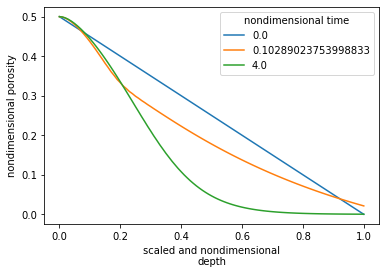

In [13]:
fs.results.phi.sel(t=(0, 0.1, 4), method='nearest').plot(hue='t');

or the variation of the grain size at a depth of 20 m as a time series:

## Scaled, irregular-unscaled, and regular-unscaled depths.

In [100]:
fs.interp_at_depth(depth_to_interp = 40, var_name = 'A')

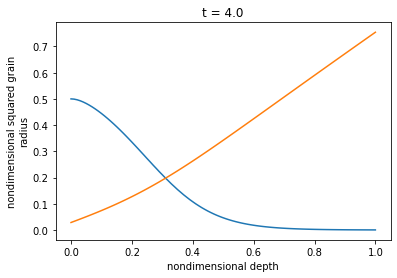

In [39]:
import matplotlib.pyplot as plt
plt.figure()
fs.results.phi.isel(t=-1).plot()
fs.results.r2.isel(t=-1).plot()


In [240]:
import importlib
importlib.reload(fcm)
test = fcm.fcm()
#test.param_search_1D('beta', (0.5, 1))
#test.param_search_1D('beta', np.array([1, 1.2]),r_s_dim = 3.e-07)
sim2 = fcm.fcm()
sim2.param_search_1D('r_s_dim', (2.5e-07, 3e-07, 4e-07), beta = 0.5)  

*** Starting setup.
*** Defining default parameters.
 ---- overwriting  r_s_dim  with a user-defined value of 2.5e-07 .
 ---- overwriting  beta  with a user-defined value of 0.5 .
*** Setup complete.
*** Starting integration.
*** Succesfully finished integration in  0.562535285949707 seconds.
*** Post-processing.
*** Starting setup.
*** Defining default parameters.
 ---- overwriting  r_s_dim  with a user-defined value of 3e-07 .
 ---- overwriting  beta  with a user-defined value of 0.5 .
*** Setup complete.
*** Starting integration.
*** Succesfully finished integration in  0.4988820552825928 seconds.
*** Post-processing.
*** Starting setup.
*** Defining default parameters.
 ---- overwriting  r_s_dim  with a user-defined value of 4e-07 .
 ---- overwriting  beta  with a user-defined value of 0.5 .
*** Setup complete.
*** Starting integration.
*** Succesfully finished integration in  1.6458959579467773 seconds.
*** Post-processing.


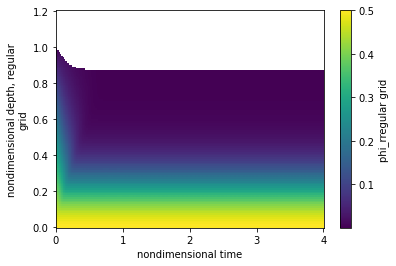

In [58]:
fs.interp_regular_z()

fs.results.phi_r.plot()

In [47]:
fs.interp_regular_z()
fs.results

<xarray.Dataset>
Dimensions:  (t: 349, z_h: 101, z: 120)
Coordinates:
  * t        (t) float64 0.0 0.00707 0.01414 0.0238 ... 3.968 3.979 3.991 4.0
  * z_h      (z_h) float64 0.0 0.01 0.02 0.03 0.04 ... 0.96 0.97 0.98 0.99 1.0
    depth    (z_h, t) float64 0.0 0.0 0.0 0.0 0.0 ... 87.4 87.4 87.4 87.4 87.4
  * z        (z) float64 0.0 0.01008 0.02017 0.03025 ... 1.17 1.18 1.19 1.2
Data variables:
    phi      (z_h, t) float64 0.5 0.5 0.5 0.5 ... 0.0002885 0.0002885 0.0002885
    r2       (z_h, t) float64 0.02857 0.02857 0.02857 ... 0.7542 0.7542 0.7542
    rho      (z_h, t) float64 459.0 459.0 459.0 459.0 ... 917.7 917.7 917.7
    A        (z_h, t) float64 0.0 0.0 0.0 0.0 ... 0.7519 0.7519 0.7519 0.7519
    T        (z_h, t) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    w        (z_h, t) float64 2.0 2.0 2.0 2.0 2.0 2.0 ... 1.0 1.0 1.0 1.0 1.0
    h        (t) float64 1.0 0.9962 0.9924 0.9871 ... 0.874 0.874 0.874 0.874
    M        (t) float64 75.0 75.0 75.0 75.0 75.0 ... 74.97 74.97 74.97 74.97
    FAC      (t) float64 25.0 24.62 24.24 23.7 23.03 ... 12.43 12.43 12.43 12.43
    z830     (t) float64 0.8083 0.8016 0.7945 0.7842 ... 0.3627 0.3627 0.3627
    phi_i    (z, t) float64 0.5 0.5 0.5 0.5 0.5 0.5 ... nan nan nan nan nan nan
Attributes: (1)

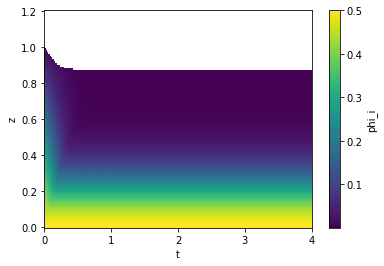

In [45]:
fs.z_t_plot('phi_i')

In [66]:
print(i)
fs.results.depth.isel(t=4).values
fs.results.phi.isel(t=i).values

0


array([ 0.        ,  0.98028049,  1.96056099,  2.94084148,  3.92112198,
        4.90140247,  5.88168297,  6.86196346,  7.84224396,  8.82252445,
        9.80280495, 10.78308544, 11.76336594, 12.74364643, 13.72392692,
       14.70420742, 15.68448791, 16.66476841, 17.6450489 , 18.6253294 ,
       19.60560989, 20.58589039, 21.56617088, 22.54645138, 23.52673187,
       24.50701236, 25.48729286, 26.46757335, 27.44785385, 28.42813434,
       29.40841484, 30.38869533, 31.36897583, 32.34925632, 33.32953682,
       34.30981731, 35.29009781, 36.2703783 , 37.25065879, 38.23093929,
       39.21121978, 40.19150028, 41.17178077, 42.15206127, 43.13234176,
       44.11262226, 45.09290275, 46.07318325, 47.05346374, 48.03374424,
       49.01402473, 49.99430522, 50.97458572, 51.95486621, 52.93514671,
       53.9154272 , 54.8957077 , 55.87598819, 56.85626869, 57.83654918,
       58.81682968, 59.79711017, 60.77739066, 61.75767116, 62.73795165,
       63.71823215, 64.69851264, 65.67879314, 66.65907363, 67.63

In [242]:
sim2.results

<xarray.Dataset>
Dimensions:  (r_s_dim: 3, z_h: 101)
Coordinates:
  * z_h      (z_h) float64 0.0 0.01 0.02 0.03 0.04 ... 0.96 0.97 0.98 0.99 1.0
    depth    (r_s_dim, z_h) float64 0.0 0.8582 1.716 2.575 ... 85.04 85.91 86.78
    t        float64 4.0
  * r_s_dim  (r_s_dim) float64 2.5e-07 3e-07 4e-07
Data variables:
    phi      (r_s_dim, z_h) float64 0.5 0.4985 0.4945 ... 0.0002327 0.0002085
    r2       (r_s_dim, z_h) float64 0.02857 0.03715 0.04579 ... 1.433 1.448
    rho      (r_s_dim, z_h) float64 459.0 460.4 464.1 ... 917.8 917.8 917.8
    A        (r_s_dim, z_h) float64 0.0 0.008608 0.01728 ... 1.469 1.486 1.504
    T        (r_s_dim, z_h) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    w        (r_s_dim, z_h) float64 1.0 0.997 0.989 ... 0.5001 0.5001 0.5001
    H        (r_s_dim) float64 0.8582 0.8616 0.8678
    M        (r_s_dim) float64 74.97 74.97 74.97
    FAC      (r_s_dim) float64 10.85 11.19 11.81
    z830     (r_s_dim) float64 0.3221 0.3308 0.3465
Attributes: (1)

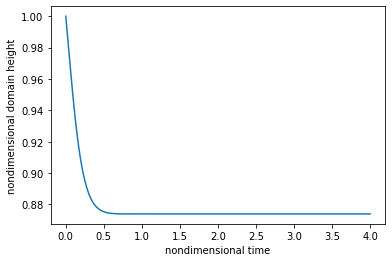

In [125]:
test.time_series()

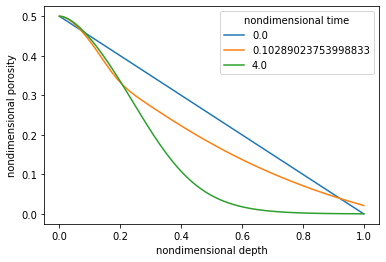

In [209]:
test.profiles('phi',[0, 0.1, 10])

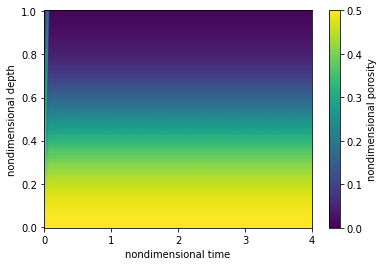

In [106]:
test.z_t_plot('phi')

In [171]:
param_to_vary = 'beta'


#add(**attributes)

#param_values = (1, 1.2, 1.4)
param_values = np.arange(0.1, 4, 0.1)
#param_values = np.array([0.1, 2, 5])

keywords_to_pass = {param_to_vary: param_values[0]}
#temp = fcm.fcm()
test.run(**keywords_to_pass)
allResults = temp.results

for x in param_values[1:]:
    keywords_to_pass = {param_to_vary: x}
    #temp = fcm.fcm(**keywords_to_pass)
    test.run(**keywords_to_pass)
    allResults = xr.concat([allResults, temp.results], param_to_vary)
allResults = allResults.assign_coords({param_to_vary: (param_to_vary, np.array(param_values))})
allResults

*** Starting setup.
*** Defining default parameters.
 ---- overwriting  beta  with a user-defined value of 0.1 .
*** Setup complete.
*** Starting integration.
*** Succesfully finished integration in  0.19243907928466797 seconds.
*** Post-processing.
*** Starting setup.
*** Defining default parameters.
 ---- overwriting  beta  with a user-defined value of 0.2 .
*** Setup complete.
*** Starting integration.
*** Succesfully finished integration in  0.45950984954833984 seconds.
*** Post-processing.
*** Starting setup.
*** Defining default parameters.
 ---- overwriting  beta  with a user-defined value of 0.30000000000000004 .
*** Setup complete.
*** Starting integration.
*** Succesfully finished integration in  0.37427306175231934 seconds.
*** Post-processing.
*** Starting setup.
*** Defining default parameters.
 ---- overwriting  beta  with a user-defined value of 0.4 .
*** Setup complete.
*** Starting integration.
*** Succesfully finished integration in  0.3596010208129883 seconds.
*** Po

<xarray.Dataset>
Dimensions:  (t: 27089, beta: 39, z_h: 101)
Coordinates:
  * t        (t) float64 0.0 0.001619 0.001663 0.001708 ... 3.999 3.999 4.0 4.0
  * z_h      (z_h) float64 0.0 0.01 0.02 0.03 0.04 ... 0.96 0.97 0.98 0.99 1.0
    depth    (beta, z_h, t) float64 0.0 nan nan nan nan ... nan nan nan 92.95
  * beta     (beta) float64 0.1 0.2 0.3 0.4 0.5 0.6 ... 3.4 3.5 3.6 3.7 3.8 3.9
Data variables:
    phi      (beta, z_h, t) float64 0.5 nan nan nan nan ... nan nan nan 0.001633
    r2       (beta, z_h, t) float64 0.02857 nan nan nan ... nan nan nan 0.2193
    rho      (beta, z_h, t) float64 459.0 nan nan nan nan ... nan nan nan 916.5
    A        (beta, z_h, t) float64 0.0 nan nan nan nan ... nan nan nan 0.1929
    T        (beta, z_h, t) float64 0.0 nan nan nan nan ... nan nan nan nan 0.0
    w        (beta, z_h, t) float64 0.2 nan nan nan nan ... nan nan nan 3.906
    H        (beta, t) float64 1.0 nan nan nan nan ... nan nan nan nan 0.9295
    M        (beta, t) float64 75.0 nan nan nan nan ... nan nan nan nan 74.99
    FAC      (beta, t) float64 25.0 nan nan nan nan ... nan nan nan nan 17.96
    z830     (beta, t) float64 0.8083 nan nan nan nan ... nan nan nan nan 0.5076
Attributes: (1)

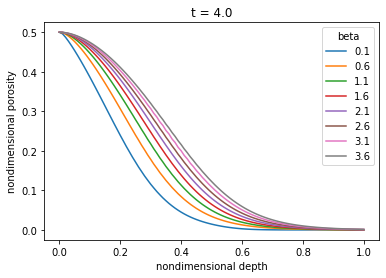

In [187]:
# plot final profiles of phi for different beta's, but only plot every 5th beta value. 
allResults.phi.sel(t=4).isel(beta=np.arange(0,39,5)).plot.line(x='z_h');

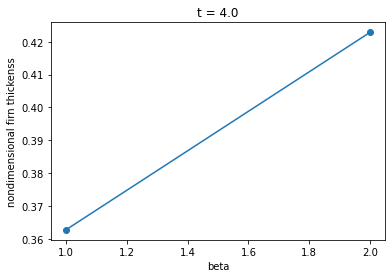

In [234]:
# plot variation of firn thickness with beta
allResults.z830.sel(t=4).plot(marker='o')

In [152]:
allResults

<xarray.Dataset>
Dimensions:        (beta: 3, z_h: 101, t: 349)
Coordinates:
  * z_h            (z_h) float64 0.0 0.01 0.02 0.03 0.04 ... 0.97 0.98 0.99 1.0
    depth          (z_h, t) float64 0.0 0.0 0.0 0.0 0.0 ... 87.4 87.4 87.4 87.4
  * t              (t) float64 0.0 0.00707 0.01414 0.0238 ... 3.979 3.991 4.0
    param_values   (beta) float64 1.0 1.2 1.4
    param_to_vary  (beta) float64 1.0 1.2 1.4
  * beta           (beta) float64 1.0 1.2 1.4
Data variables:
    phi            (beta, z_h, t) float64 0.5 0.5 0.5 ... 0.0002885 0.0002885
    r2             (beta, z_h, t) float64 0.02857 0.02857 ... 0.7542 0.7542
    rho            (beta, z_h, t) float64 459.0 459.0 459.0 ... 917.7 917.7
    A              (beta, z_h, t) float64 0.0 0.0 0.0 ... 0.7519 0.7519 0.7519
    T              (beta, z_h, t) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    w              (beta, z_h, t) float64 2.0 2.0 2.0 2.0 ... 1.0 1.0 1.0 1.0
    H              (beta, t) float64 1.0 0.9962 0.9924 ... 0.874 0.874 0.874
    M              (beta, t) float64 75.0 75.0 75.0 75.0 ... 74.97 74.97 74.97
    FAC            (beta, t) float64 25.0 24.62 24.24 23.7 ... 12.43 12.43 12.43
    z830           (beta, t) float64 0.8083 0.8016 0.7945 ... 0.3627 0.3627
Attributes: (1)

In [194]:
param_values

array([0.1])

In [196]:

param_values = np.array([0.1, 1])

keywords_to_pass = {param_to_vary: param_values[0]}
temp = fcm.fcm(**keywords_to_pass)
temp.integrate()
allResults = temp.results

allResults

*** Starting setup.
*** Defining default parameters.
 ---- overwriting  beta  with a user-defined value of 0.1 .
*** Setup complete.
*** Starting integration.
*** Succesfully finished integration in  0.22431421279907227 seconds.
*** Post-processing.


<xarray.Dataset>
Dimensions:  (z_h: 101, t: 40)
Coordinates:
  * z_h      (z_h) float64 0.0 0.01 0.02 0.03 0.04 ... 0.96 0.97 0.98 0.99 1.0
    depth    (z_h, t) float64 0.0 0.0 0.0 0.0 0.0 ... 83.74 83.74 83.75 83.75
  * t        (t) float64 0.0 0.04105 0.09549 0.1676 ... 3.744 3.849 3.965 4.0
Data variables:
    phi      (z_h, t) float64 0.5 0.5 0.5 0.5 ... 3.582e-07 3.445e-07 3.413e-07
    r2       (z_h, t) float64 0.02857 0.02857 0.02857 ... 3.694 3.762 3.782
    rho      (z_h, t) float64 459.0 459.0 459.0 459.0 ... 918.0 918.0 918.0
    A        (z_h, t) float64 0.0 0.0 0.0 0.0 0.0 ... 4.326 4.417 4.518 4.549
    T        (z_h, t) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    w        (z_h, t) float64 0.2 0.2 0.2 0.2 ... 0.1006 0.1006 0.1005 0.1005
    H        (t) float64 1.0 0.9514 0.909 0.8749 ... 0.8374 0.8374 0.8375 0.8375
    M        (t) float64 75.0 74.99 74.98 74.97 ... 74.96 74.96 74.96 74.96
    FAC      (t) float64 25.0 20.15 15.92 12.52 10.08 ... 8.778 8.784 8.79 8.792
    z830     (t) float64 0.8083 0.7032 0.5805 0.4479 ... 0.2692 0.2692 0.2693
Attributes: (1)

In [198]:

for x in param_values[1:]:
    keywords_to_pass = {param_to_vary: x}
    temp = fcm.fcm(**keywords_to_pass)
    temp.integrate()
    #allResults = xr.concat([allResults, temp.results], param_to_vary)
#allResults = allResults.assign_coords({param_to_vary: (param_to_vary, np.array(param_values))})
#allResults


*** Starting setup.
*** Defining default parameters.
 ---- overwriting  beta  with a user-defined value of 1.0 .
*** Setup complete.
*** Starting integration.
*** Succesfully finished integration in  1.292320966720581 seconds.
*** Post-processing.


<xarray.Dataset>
Dimensions:  (z_h: 101, t: 40)
Coordinates:
  * z_h      (z_h) float64 0.0 0.01 0.02 0.03 0.04 ... 0.96 0.97 0.98 0.99 1.0
    depth    (z_h, t) float64 0.0 0.0 0.0 0.0 0.0 ... 83.74 83.74 83.75 83.75
  * t        (t) float64 0.0 0.04105 0.09549 0.1676 ... 3.744 3.849 3.965 4.0
Data variables:
    phi      (z_h, t) float64 0.5 0.5 0.5 0.5 ... 3.582e-07 3.445e-07 3.413e-07
    r2       (z_h, t) float64 0.02857 0.02857 0.02857 ... 3.694 3.762 3.782
    rho      (z_h, t) float64 459.0 459.0 459.0 459.0 ... 918.0 918.0 918.0
    A        (z_h, t) float64 0.0 0.0 0.0 0.0 0.0 ... 4.326 4.417 4.518 4.549
    T        (z_h, t) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    w        (z_h, t) float64 0.2 0.2 0.2 0.2 ... 0.1006 0.1006 0.1005 0.1005
    H        (t) float64 1.0 0.9514 0.909 0.8749 ... 0.8374 0.8374 0.8375 0.8375
    M        (t) float64 75.0 74.99 74.98 74.97 ... 74.96 74.96 74.96 74.96
    FAC      (t) float64 25.0 20.15 15.92 12.52 10.08 ... 8.778 8.784 8.79 8.792
    z830     (t) float64 0.8083 0.7032 0.5805 0.4479 ... 0.2692 0.2692 0.2693
Attributes: (1)

In [200]:
allResults = xr.concat([allResults, temp.results], param_to_vary)

In [202]:
temp.results

<xarray.Dataset>
Dimensions:  (z_h: 101, t: 349)
Coordinates:
  * z_h      (z_h) float64 0.0 0.01 0.02 0.03 0.04 ... 0.96 0.97 0.98 0.99 1.0
    depth    (z_h, t) float64 0.0 0.0 0.0 0.0 0.0 ... 87.4 87.4 87.4 87.4 87.4
  * t        (t) float64 0.0 0.00707 0.01414 0.0238 ... 3.968 3.979 3.991 4.0
Data variables:
    phi      (z_h, t) float64 0.5 0.5 0.5 0.5 ... 0.0002885 0.0002885 0.0002885
    r2       (z_h, t) float64 0.02857 0.02857 0.02857 ... 0.7542 0.7542 0.7542
    rho      (z_h, t) float64 459.0 459.0 459.0 459.0 ... 917.7 917.7 917.7
    A        (z_h, t) float64 0.0 0.0 0.0 0.0 ... 0.7519 0.7519 0.7519 0.7519
    T        (z_h, t) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    w        (z_h, t) float64 2.0 2.0 2.0 2.0 2.0 2.0 ... 1.0 1.0 1.0 1.0 1.0
    H        (t) float64 1.0 0.9962 0.9924 0.9871 ... 0.874 0.874 0.874 0.874
    M        (t) float64 75.0 75.0 75.0 75.0 75.0 ... 74.97 74.97 74.97 74.97
    FAC      (t) float64 25.0 24.62 24.24 23.7 23.03 ... 12.43 12.43 12.43 12.43
    z830     (t) float64 0.8083 0.8016 0.7945 0.7842 ... 0.3627 0.3627 0.3627
Attributes: (1)

In [203]:
allResults

<xarray.Dataset>
Dimensions:  (t: 387, beta: 2, z_h: 101)
Coordinates:
  * t        (t) float64 0.0 0.00707 0.01414 0.0238 ... 3.968 3.979 3.991 4.0
  * z_h      (z_h) float64 0.0 0.01 0.02 0.03 0.04 ... 0.96 0.97 0.98 0.99 1.0
    depth    (beta, z_h, t) float64 0.0 nan nan nan nan ... 87.4 87.4 87.4 87.4
Dimensions without coordinates: beta
Data variables:
    phi      (beta, z_h, t) float64 0.5 nan nan ... 0.0002885 0.0002885
    r2       (beta, z_h, t) float64 0.02857 nan nan nan ... 0.7542 0.7542 0.7542
    rho      (beta, z_h, t) float64 459.0 nan nan nan ... 917.7 917.7 917.7
    A        (beta, z_h, t) float64 0.0 nan nan nan ... 0.7519 0.7519 0.7519
    T        (beta, z_h, t) float64 0.0 nan nan nan nan ... nan 0.0 0.0 0.0 0.0
    w        (beta, z_h, t) float64 0.2 nan nan nan nan ... nan 1.0 1.0 1.0 1.0
    H        (beta, t) float64 1.0 nan nan nan nan ... 0.874 0.874 0.874 0.874
    M        (beta, t) float64 75.0 nan nan nan nan ... 74.97 74.97 74.97 74.97
    FAC      (beta, t) float64 25.0 nan nan nan nan ... 12.43 12.43 12.43 12.43
    z830     (beta, t) float64 0.8083 nan nan nan ... 0.3627 0.3627 0.3627
Attributes: (1)

In [26]:
import hvplot.xarray as hv

test.results.phi.hvplot()   # static z-t plot of phi


:Image   [t,z_h]   (phi)